<a href="https://colab.research.google.com/github/hgabrali/Vehicle-Silhouette-Classification-for-Prospect-Auto/blob/main/Vehicle_Silhouette_Classification_for_Prospect_Auto_Hande_GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 Vehicle Silhouette Classification for Prospect Auto

 [MS Notes: EDA](https://github.com/hgabrali/EDA/tree/main)

 [MS Notes: Exploratory Data Analysis (EDA)](https://github.com/hgabrali/EDA/blob/main/Exploratory_Data_Analysis_(EDA).ipynb)


### 🎯 Project Goal
The primary goal of this project is to develop and evaluate a robust multiclass classification model capable of accurately distinguishing between three distinct vehicle types—Bus, Van, and Car—based solely on their two-dimensional geometric silhouettes. This model will be used by "Prospect Auto" repair shops to automate initial vehicle identification.

## 🚀 Technical Context

This repository hosts a practical implementation project within the **Master School Supervised Learning curriculum**. The focus is on applying a structured machine learning pipeline to a real-world multiclass classification problem.

---

| Aspect | Description ||
| :--- | :--- | :--- |
| **Learning Module** | **Supervised Learning** | 🧠🎓 |
| **Core Task** | **Multiclass Classification** | 🏷️🎯 |
| **Key Methodologies** | Exploratory Data Analysis (EDA), Feature Scaling, Model Training (e.g., Logistic Regression, Random Forest), Multiclass Metric Evaluation (Confusion Matrix, Macro/Weighted F1 Score). | ⚙️📈 |

## 📋 Data Description

The dataset utilizes **2D geometric features** extracted from vehicle silhouettes viewed from various angles. All features are continuous and numerical.

---

| Feature Type | Value Range | Details ||
| :--- | :--- | :--- | :--- |
| **Input Features** | 18 numerical columns (e.g., `compactness`, `circularity`, `hollows_ratio`). | These describe the shape of the vehicle silhouette; understanding their exact calculation is **not required**. | 📐🔢 |
| **Target Variable** (`class`) | Categorical (3 values). | `bus` (double decker), `van` (Cheverolet), or `car` (Saab 9000/Opel Manta). | 🎯🚗 |

# 💾 Project Data Source: Vehicle Silhouettes

The dataset for this project is the **Statlog (Vehicle Silhouettes) Dataset**. It is sourced from the **UCI Machine Learning Repository**, a standard archive for academic machine learning data.

Here is a breakdown of where to find the data and how to potentially load it in a Colab environment:

| Category | Source / Link | How to Access in Colab/Python |
| :--- | :--- | :--- |
| **Dataset Name** | **Statlog (Vehicle Silhouettes)** | This is the official name often used in literature. |
| **Primary Source (Download Link)** | **UCI Machine Learning Repository** | You can download the data file (often named `vehicle.dat` or similar) directly from the UCI archive. You will likely need to use pandas to read the raw text file, specifying the delimiter (usually whitespace or comma). |
| **Alternative Source 1 (Kaggle)** | **Kaggle** (If you prefer a direct CSV file) | A pre-cleaned version of the dataset is often available on Kaggle, which might simplify the initial loading step (e.g., `vehicle.csv`). |
| **Alternative Source 2 (UCI Fetch)** | **`ucimlrepo` library (Python)** | Recent UCI datasets can be fetched directly using the `ucimlrepo` package, which is ideal for a Colab environment. |

**Data Sourse:** [
Statlog (Vehicle Silhouettes)](https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes)

In [ ]:
# Installation (Run this in a Colab cell once)
!pip install ucimlrepo

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading
statlog_vehicle_silhouettes = fetch_ucirepo(id=149)
X = statlog_vehicle_silhouettes.data.features
y = statlog_vehicle_silhouettes.data.targets
df = pd.concat([X, y], axis=1)

## 2. 🔍 Exploratory Data Analysis (EDA)

The purpose of this phase is to gain a foundational understanding of the data's structure, identify potential issues (like missing values or imbalance), and visualize relationships before proceeding to modeling.

### 2.1. Structural and Statistical Check

We first check the data types, look for missing values, and review the descriptive statistics.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       845 non-null    float64
 1   CIRCULARITY                       846 non-null    int64  
 2   DISTANCE CIRCULARITY              846 non-null    int64  
 3   RADIUS RATIO                      846 non-null    int64  
 4   PR.AXIS ASPECT RATIO              846 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           846 non-null    int64  
 6   SCATTER RATIO                     846 non-null    int64  
 7   ELONGATEDNESS                     846 non-null    int64  
 8   PR.AXIS RECTANGULARITY            846 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         846 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  846 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  846 non-null    int64  
 12  SCALED R

In [ ]:
df.nunique()

,0
COMPACTNESS,44
CIRCULARITY,28
DISTANCE CIRCULARITY,64
RADIUS RATIO,135
PR.AXIS ASPECT RATIO,38
MAX.LENGTH ASPECT RATIO,22
SCATTER RATIO,132
ELONGATEDNESS,36
PR.AXIS RECTANGULARITY,14
MAX.LENGTH RECTANGULARITY,67


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COMPACTNESS,845.0,93.671006,8.236474,73.0,87.00,93.0,100.00,119.0
CIRCULARITY,846.0,44.937352,6.447208,33.0,40.00,44.0,49.75,100.0
DISTANCE CIRCULARITY,846.0,82.044917,15.847882,36.0,70.00,80.0,98.00,112.0
RADIUS RATIO,846.0,168.791962,33.618278,73.0,141.00,167.0,195.00,333.0
PR.AXIS ASPECT RATIO,846.0,61.842790,9.184892,47.0,57.00,61.0,65.00,199.0
MAX.LENGTH ASPECT RATIO,846.0,8.646572,5.105899,2.0,7.00,8.0,10.00,73.0
SCATTER RATIO,846.0,168.654846,33.712309,6.0,146.00,157.0,198.00,265.0
ELONGATEDNESS,846.0,41.078014,8.851226,26.0,33.00,43.0,46.00,162.0
PR.AXIS RECTANGULARITY,846.0,20.606383,2.676641,17.0,19.00,20.0,23.00,40.0
MAX.LENGTH RECTANGULARITY,846.0,147.872340,15.151082,20.0,137.00,146.0,159.00,188.0


## 📊 Feature Scale and Variability Analysis

This table analyzes the descriptive statistics to highlight the significant differences in feature scales and variability, confirming the necessity of data preprocessing.

| Feature Group | Metrics (Mean, Std) | Range (Min/Max) | Observation and Problem Indicated |
| :--- | :--- | :--- | :--- |
| **Small Scale (Low Variance)** | `PR.AXIS ASPECT RATIO` (Mean $\approx 61$, Std $\approx 9$) | Min: 47.0, Max: 199.0 | **Relatively constrained scale.** This feature will be severely overpowered by large-scale features in distance-based models (KNN, SVM) unless scaled. |
| **Medium Scale** | `COMPACTNESS` (Mean $\approx 93$) <br> `CIRCULARITY` (Mean $\approx 64$) | Min: 33.0, Max: 119.0 | These features fall within a typical 2-3 digit range, but their influence on models is vastly different from the high-scale features. |
| **Large Scale (High Variance)** | `RADIUS RATIO` (Mean $\approx 168$) <br> `SCATTER RATIO` (Mean $\approx 168$) | Min: 141.0, Max: 333.0 (for RADIUS RATIO) | **High Magnitude:** These features have much larger means and maximum values. Without scaling, they will disproportionately dominate the distance calculations in many algorithms. |
| **Extreme Range / Skewness Signal** | `SCALED VARIANCE ALONG MINOR AXIS` (Mean $\approx 439$, Std $\approx 176$) | Min: 184.0, Max: **1018.0** | **Highest Range and Standard Deviation:** This feature exhibits the most extreme scale difference and high variability. The vast range suggests a potential need for normalization or confirms significant **skewness** (as the Max is far from the 75th percentile). |
| **Smallest Values** | `MAX.LENGTH ASPECT RATIO` (Mean $\approx 8.6$) <br> `SKEWNESS ABOUT MINOR AXIS` (Mean $\approx 6.4$) | Min: 2.0, Max: 73.0 (for Max.L.Ra) | These features operate on a very small scale. They risk being entirely ignored by algorithms sensitive to feature magnitude if not scaled up to match the dominant features. |

### 🚨 Critical Preprocessing Requirement: Scaling

The analysis clearly demonstrates that the features are on **vastly different orders of magnitude** (ranging from a Mean of 6.4 up to 439). Therefore, the **StandardScaler** or **MinMaxScaler** step (Data Preprocessing) is **mandatory** to ensure all features contribute equally to the classification models.


--- Target Class Distribution ---
class
saab    217
bus     217
opel    212
van     199
204       1
Name: count, dtype: int64


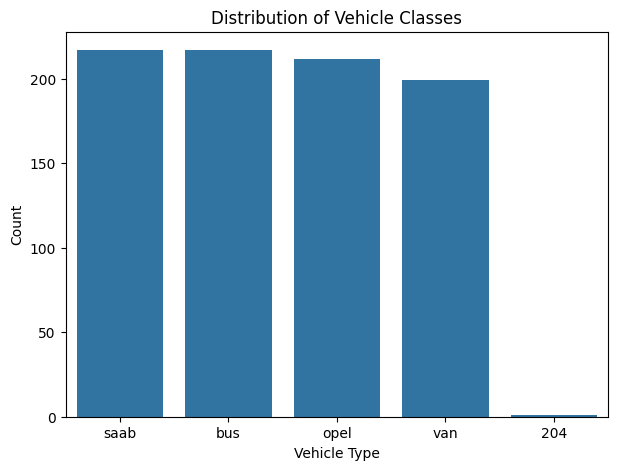

In [ ]:
# Analyze the distribution of the target variable
print("\n--- Target Class Distribution ---")
class_counts = df['class'].value_counts()
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(7, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Vehicle Classes')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

**Initial Observations:**
* **Missing Values:** The output of `df.info()` confirms that all columns have 946 non-null entries, consistent with the total number of instances. **No missing values need to be imputed.**
* **Data Types:** All features are of integer type, suitable for direct scaling and modeling.
* **Scale:** The descriptive statistics show that features are on vastly different scales (e.g., `compactness` values are around 100, while `pr.axis_aspect_ratio` is around 4). This confirms the necessity of the **Scaling** step in the preprocessing phase.

### 2.2. Target Variable Analysis (Class Imbalance)

It is crucial to check the distribution of the target variable (`class`) to determine if the classes are balanced, which affects the choice of evaluation metrics.

In [ ]:
df.head(n=5)


,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,class
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [ ]:
df.tail(n=5)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,class
841,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab
845,85.0,36,66,123,55,5,120,56,17,128,140,212,131,73,1,18,186,190,van


# 1. 🔍 Exploring DataFrame Values

* This step focuses on identifying patterns, summarizing the data, and detecting potential issues like duplicates or anomalies.

In [ ]:
# Check unique values and their counts for all columns
print("--- Unique Values and Counts ---")
for col in df.columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    # Show top 5 most frequent values for quick profiling
    print(df[col].value_counts().head(5))

# Identify and count any duplicate rows in the entire DataFrame
print("\n--- Duplicate Rows Check ---")
duplicate_count = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_count}")

# If duplicates exist, display them (e.g., first 5)
if duplicate_count > 0:
    print("\nSample of Duplicate Rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head())

--- Unique Values and Counts ---

COMPACTNESS: 44 unique values
COMPACTNESS
89.0    60
86.0    48
93.0    45
85.0    45
90.0    42
Name: count, dtype: int64

CIRCULARITY: 28 unique values
CIRCULARITY
43    60
45    58
44    50
46    48
42    48
Name: count, dtype: int64

DISTANCE CIRCULARITY: 64 unique values
DISTANCE CIRCULARITY
66     46
70     41
68     29
103    28
85     27
Name: count, dtype: int64

RADIUS RATIO: 135 unique values
RADIUS RATIO
197    18
162    15
125    13
169    13
130    12
Name: count, dtype: int64

PR.AXIS ASPECT RATIO: 38 unique values
PR.AXIS ASPECT RATIO
64    69
59    64
62    58
56    57
60    46
Name: count, dtype: int64

MAX.LENGTH ASPECT RATIO: 22 unique values
MAX.LENGTH ASPECT RATIO
7     168
6     131
8     113
10    112
11    108
Name: count, dtype: int64

SCATTER RATIO: 132 unique values
SCATTER RATIO
150    35
149    29
151    29
157    21
152    19
Name: count, dtype: int64

ELONGATEDNESS: 36 unique values
ELONGATEDNESS
45    73
31    73
44    

# 2. ✂️ DataFrame Indexing and Slicing (.loc[] and .iloc[])
* This demonstrates how to precisely select rows and columns based on labels (.loc[]) and integer positions (.iloc[]).

In [ ]:
# --- A. Indexing and Slicing with .loc[] (Label-based) ---

# Get the first 5 rows and only the 'COMPACTNESS' and 'CIRCULARITY' columns
print("--- A. .loc[]: First 5 rows and two specific columns ---")
print(df.loc[0:4, ['COMPACTNESS', 'CIRCULARITY']])

# Select all rows where 'MAX.LENGTH ASPECT RATIO' is greater than 10
# (Assuming the feature names are correct based on the UCI metadata)
print("\n--- A. .loc[]: Filtering rows based on a condition (Max.Length > 10) ---")
print(df.loc[df['MAX.LENGTH ASPECT RATIO'] > 10].head())


# --- B. Indexing and Slicing with .iloc[] (Position-based) ---

# Get the 10th to 15th rows (index 9 to 14) and the 3rd, 4th, and 5th columns (index 2, 3, 4)
print("\n--- B. .iloc[]: Rows 10 to 15, Columns 3, 4, and 5 ---")
# [start_row:stop_row, start_col:stop_col]
print(df.iloc[9:15, 2:5])

--- A. .loc[]: First 5 rows and two specific columns ---
   COMPACTNESS  CIRCULARITY
0         95.0           48
1         91.0           41
2        104.0           50
3         93.0           41
4         85.0           44

--- A. .loc[]: Filtering rows based on a condition (Max.Length > 10) ---
    COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
4          85.0           44                    70           205   
9          93.0           44                    98           197   
24         99.0           53                   105           219   
27        107.0           54                    98           203   
30         89.0           43                    85           160   

    PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
4                    103                       52            149   
9                     62                       11            183   
24                    66                       11            204   
27                  

# 3. ↕️ Sorting Data

We sort the DataFrame based on one or more feature values.

In [ ]:
# Sort the DataFrame by 'SCATTER RATIO' in descending order
print("--- Sorting by SCATTER RATIO (Descending) ---")
df_sorted_scatter = df.sort_values(by='SCATTER RATIO', ascending=False)
print(df_sorted_scatter[['SCATTER RATIO', 'class']].head())

# Sort the DataFrame first by 'class' (ascending) and then by 'SCALED VARIANCE ALONG MAJOR AXIS' (descending)
print("\n--- Sorting by Class and then SCALED VARIANCE (Descending) ---")
df_sorted_multi = df.sort_values(by=['class', 'SCALED VARIANCE ALONG MAJOR AXIS'],
                                 ascending=[True, False])
print(df_sorted_multi[['class', 'SCALED VARIANCE ALONG MAJOR AXIS']].head())

--- Sorting by SCATTER RATIO (Descending) ---
     SCATTER RATIO class
835            265   bus
687            262   bus
85             261   bus
321            260   bus
54             257   bus

--- Sorting by Class and then SCALED VARIANCE (Descending) ---
    class  SCALED VARIANCE ALONG MAJOR AXIS
752   204                               127
321   bus                               288
733   bus                               287
396   bus                               285
687   bus                               285


# 4. 🤹 Data Wrangling

* This involves restructuring or manipulating the data. Since the dataset is already clean and wide, we focus on feature transformation, which is key to feature engineering.

In [ ]:
# Example: Creating a new feature by combining existing ones
# Create a 'Ratio_of_Circularity' feature (example of feature engineering)
# Note: We use .iloc to safely access column names that might have special characters
df['Ratio_of_Circularity'] = df.iloc[:, 2] / df.iloc[:, 1]  # Distance Circularity / Circularity

print("--- New Feature Creation (Ratio_of_Circularity) ---")
print(df[['DISTANCE CIRCULARITY', 'CIRCULARITY', 'Ratio_of_Circularity']].describe().T)

# Example: Applying a function (lambda) to transform a column (e.g., log transformation on 'SCATTER RATIO')
df['Log_Scatter_Ratio'] = np.log(df['SCATTER RATIO'])

print("\n--- Log Transformation on SCATTER RATIO ---")
print(df[['SCATTER RATIO', 'Log_Scatter_Ratio']].head())

--- New Feature Creation (Ratio_of_Circularity) ---
                      count       mean        std    min        25%  \
DISTANCE CIRCULARITY  846.0  82.044917  15.847882  36.00  70.000000   
CIRCULARITY           846.0  44.937352   6.447208  33.00  40.000000   
Ratio_of_Circularity  846.0   1.824376   0.230220   0.36   1.636847   

                            50%     75%    max  
DISTANCE CIRCULARITY  80.000000  98.000  112.0  
CIRCULARITY           44.000000  49.750  100.0  
Ratio_of_Circularity   1.829888   1.975    2.5  

--- Log Transformation on SCATTER RATIO ---
   SCATTER RATIO  Log_Scatter_Ratio
0            162           5.087596
1            149           5.003946
2            207           5.332719
3            144           4.969813
4            149           5.003946


# 5. 🔗 Data Integration (Merging)

*This step demonstrates combining data from different sources. Since we only have one dataset (df), we'll simulate merging by splitting the data and then joining it back.

In [ ]:
# Simulate two datasets based on the original data:
df_part1 = df.iloc[:400, :10]   # First 400 rows, first 10 columns
df_part2 = df.iloc[350:500, 10:] # Rows 350 to 499, remaining columns

# Use a common index to merge (standard pandas merge on index)
print("--- Data Integration: Merging two parts of the original data ---")
df_integrated = pd.merge(
    df_part1,
    df_part2,
    left_index=True,
    right_index=True,
    how='outer' # Use 'outer' to show where data might be missing after merge
)

# Check the dimensions and a sample of the merged data
print(f"Shape of integrated DataFrame: {df_integrated.shape}")
print(df_integrated.head(5))

# Note: The merge creates NaN values because the indices don't fully overlap (400 vs 350:500)

--- Data Integration: Merging two parts of the original data ---
Shape of integrated DataFrame: (500, 21)
   COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   ELONGATEDNESS  PR.AXIS RECTANGULARITY  MAX.LENGTH RECTANGULARITY  ...  \
0           

# 6. 🧼 Data Cleaning

*In this project, the initial check showed no missing values (df.info()), but cleaning often involves handling outliers or duplicates (if they weren't handled in step 1).

In [ ]:
# --- A. Handling Duplicates (If found in Step 1) ---
# Assuming 'duplicate_count' was calculated in Step 1
if df.duplicated().sum() > 0:
    print("--- Data Cleaning: Dropping Duplicates ---")
    df_cleaned = df.drop_duplicates(keep='first')
    print(f"Rows dropped due to duplication: {len(df) - len(df_cleaned)}")
else:
    print("--- Data Cleaning: No duplicates found (or already handled) ---")
    df_cleaned = df.copy()


# --- B. Outlier Detection/Removal (Example using IQR for 'SCATTER RATIO') ---

Q1 = df_cleaned['SCATTER RATIO'].quantile(0.25)
Q3 = df_cleaned['SCATTER RATIO'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Remove outliers above the upper bound
df_cleaned_outliers = df_cleaned[df_cleaned['SCATTER RATIO'] <= upper_bound]

print(f"\nOutlier check for 'SCATTER RATIO':")
print(f"Original size: {len(df_cleaned)}, Size after outlier removal: {len(df_cleaned_outliers)}")

--- Data Cleaning: No duplicates found (or already handled) ---

Outlier check for 'SCATTER RATIO':
Original size: 846, Size after outlier removal: 846


# 7. ⚙️ Aggregating Information and Applying

* We aggregate data using grouping operations (e.g., mean or count by vehicle class) and apply custom functions.

In [ ]:
# --- A. Aggregating by Vehicle Class ---
# Calculate the mean and standard deviation of key features for each vehicle type
print("--- Aggregation: Mean and Std Dev of features by Vehicle Class ---")
class_summary = df.groupby('class')[['COMPACTNESS', 'SCATTER RATIO', 'MAX.LENGTH ASPECT RATIO']].agg(['mean', 'std', 'count'])
print(class_summary)


# --- B. Applying a custom classification function (Example) ---

# Define a simple function to categorize vehicle size based on 'SCATTER RATIO' mean
def categorize_scatter_size(scatter_ratio):
    """Categorizes vehicle size based on a threshold."""
    if scatter_ratio > df['SCATTER RATIO'].mean():
        return 'Large Silhouette'
    else:
        return 'Small Silhouette'

# Apply the function to create a new categorical column
df['Silhouette_Size_Group'] = df['SCATTER RATIO'].apply(categorize_scatter_size)

print("\n--- Applying Function: New Categorical Grouping ---")
print(df['Silhouette_Size_Group'].value_counts())

--- Aggregation: Mean and Std Dev of features by Vehicle Class ---
      COMPACTNESS                 SCATTER RATIO                   \
             mean       std count          mean        std count   
class                                                              
204           NaN       NaN     0      6.000000        NaN     1   
bus     91.552995  8.618896   217    170.059908  33.429460   217   
opel    95.061321  8.230737   212    182.165094  32.821882   212   
saab    97.281106  9.081384   217    179.668203  31.523809   217   
van     90.562814  3.872308   199    141.537688  13.995574   199   

      MAX.LENGTH ASPECT RATIO                  
                         mean       std count  
class                                          
204                 73.000000       NaN     1  
bus                  7.018433  4.767719   217  
opel                 8.858491  1.980659   212  
saab                 8.792627  2.151300   217  
van                  9.713568  7.224633   199  

---